Calculating and Comparing Rates of Return in Python

1.Simple Returns

In [4]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [7]:
PG=wb.DataReader('PG',data_source='yahoo',start='1995-1-1')
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.313478
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.246841
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,8.130219
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.146880
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,8.113561


In [9]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-04,118.830002,115.570000,118.000000,116.050003,6895800.0,116.050003
2020-06-05,118.830002,116.050003,116.250000,118.330002,7337800.0,118.330002
2020-06-08,119.120003,116.839996,117.440002,119.050003,6926700.0,119.050003
2020-06-09,119.760002,118.150002,119.400002,118.339996,5563200.0,118.339996
2020-06-10,119.889999,118.110001,119.000000,119.230003,6673500.0,119.230003


Simple Rate of Return 

In [14]:
PG['simple_return']=(PG['Adj Close']/PG['Adj Close'].shift(1))-1
print (PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-06-04   -0.020923
2020-06-05    0.019647
2020-06-08    0.006085
2020-06-09   -0.005964
2020-06-10    0.007521
Name: simple_return, Length: 6405, dtype: float64


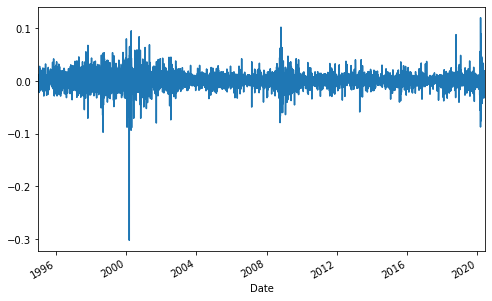

In [16]:
PG['simple_return'].plot(figsize=(8,5))

In [18]:
avg_returns_d=PG['simple_return'].mean()
avg_returns_d

0.0005196002323121731

In [20]:
avg_returns_a=PG['simple_return'].mean()*250
avg_returns_a

0.12990005807804328

In [27]:
print (str(round(avg_returns_a,3 )*100)+'%')

13.0%


Log Returns

In [29]:
 PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.313478,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.246841,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,8.130219,-0.014141
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.146880,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,8.113561,-0.004090


In [32]:
PG['log_return']=np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
print (PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2020-06-04   -0.021145
2020-06-05    0.019456
2020-06-08    0.006066
2020-06-09   -0.005982
2020-06-10    0.007493
Name: log_return, Length: 6405, dtype: float64


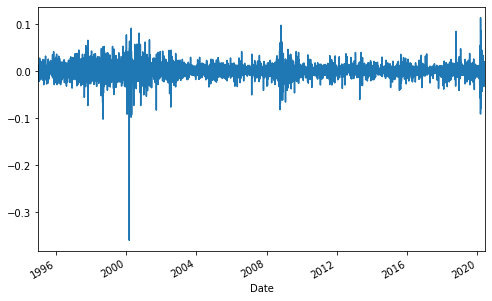

In [34]:
PG['log_return'].plot(figsize=(8,5))
plt.show()

In [37]:
log_return_d=PG['log_return'].mean()
log_return_d

0.00041586138651780903

In [39]:
log_return_a=PG['log_return'].mean()*250
log_return_a

0.10396534662945225

In [41]:
print (str(round(log_return_a,3)*100)+'%')

10.4%


Calculating the rate of return of a portfolio 

In [43]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 

In [46]:
tickers=['PG','MSFT','F','GE']
mydata=pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t,data_source='yahoo',start='1995-1-1')['Adj Close']

In [48]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6406 entries, 1995-01-03 to 2020-06-11
Data columns (total 4 columns):
PG      6406 non-null float64
MSFT    6406 non-null float64
F       6406 non-null float64
GE      6406 non-null float64
dtypes: float64(4)
memory usage: 250.2 KB


In [50]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.406834,3.262354,2.729230
1995-01-04,6.269589,2.424330,3.350130,2.729230
1995-01-05,6.180927,2.384342,3.320871,2.735919
1995-01-06,6.193593,2.424330,3.320871,2.722540
1995-01-09,6.168259,2.409335,3.379390,2.695783


Normalization to 100: p1/p0 *100

In [52]:
mydata.iloc[0]

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

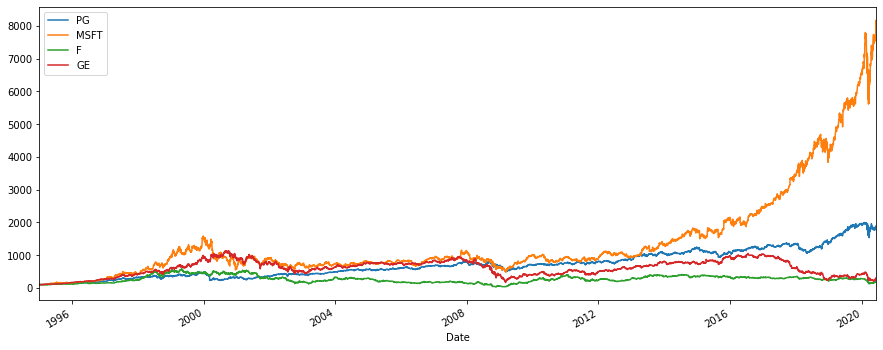

In [55]:
# 4 stocks are all begin with same value 
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6));
plt.show()

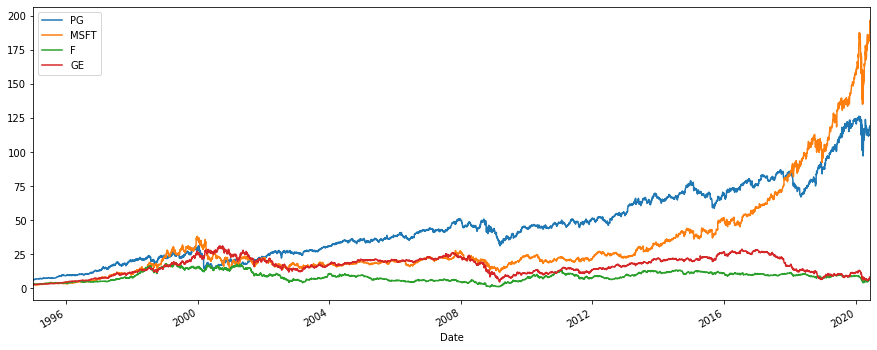

In [57]:
# 4 stocks are not begining with same value 
mydata.plot(figsize=(15,6));
plt.show()

In [59]:
# loc with label
mydata.loc['1995-01-03']

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

In [61]:
# iloc with position
mydata.iloc[0]

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

In [63]:
# Calculating the Return of a Portfolio of Securities 
returns=(mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009828


In [65]:
weights=np.array([0.25,0.25,0.25,0.25])

In [67]:
# np dot() - calculates vector or matrix products the output: dot product
np.dot(returns,weights)

array([        nan,  0.00653977, -0.00922981, ..., -0.02221027,
       -0.01647552, -0.06629735])

In [69]:
annual_returns=returns.mean()*250
annual_returns

PG      0.139654
MSFT    0.219875
F       0.104695
GE      0.087021
dtype: float64

In [71]:
np.dot(annual_returns,weights)

0.13781129441974

In [75]:
portfolio_1=str(round(np.dot(annual_returns,weights),3)*100)+'%'
print (portfolio_1)

13.8%


In [87]:
weights_2=np.array([0.4,0.4,0.15,0.05])

In [89]:
portfolio_2=str(round(np.dot(annual_returns,weights_2),2)*100)+"%"
print (portfolio_1)
print(portfolio_2)

13.8%
16.0%


Calculating the Indices'Rate of Return

In [101]:
tickers=['^GSPC','^IXIC','^GDAXI','^DJI']
ind_data=pd.DataFrame()
for t in tickers:
    ind_data[t]=wb.DataReader(t,data_source='yahoo',start='1997-1-1')['Adj Close']

In [103]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,6442.490234
1997-01-03,748.030029,1310.680054,2863.260010,6544.089844
1997-01-06,747.650024,1316.400024,2890.199951,6567.180176
1997-01-07,753.229980,1327.729980,2876.340088,6600.660156
1997-01-08,748.409973,1320.349976,2904.080078,6549.479980


In [105]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
2020-06-05,3193.929932,9814.080078,12847.679688,27110.980469
2020-06-08,3232.389893,9924.750000,12819.589844,27572.439453
2020-06-09,3207.179932,9953.750000,12617.990234,27272.300781
2020-06-10,3190.139893,10020.349609,12530.160156,26989.990234
2020-06-11,3002.100098,9492.726562,11970.290039,25128.169922


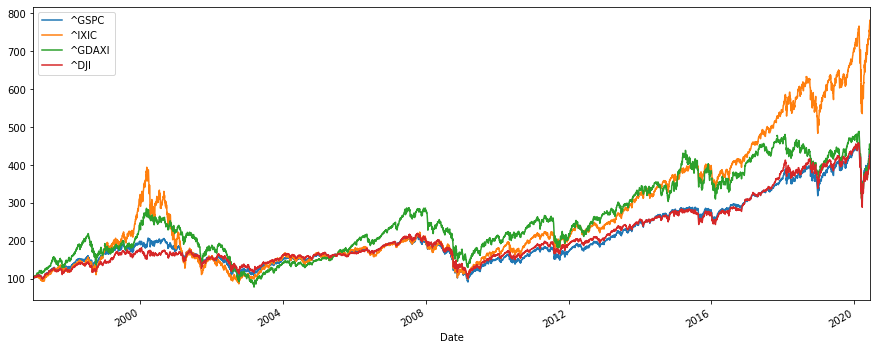

In [107]:
(ind_data/ind_data.iloc[0]*100).plot(figsize=(15,6));
plt.show()

In [110]:
ind_returns=(ind_data/ind_data.shift(1))-1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
2020-06-05,0.026212,0.020619,0.033556,0.031549
2020-06-08,0.012042,0.011277,-0.002186,0.017021
2020-06-09,-0.007799,0.002922,-0.015726,-0.010885
2020-06-10,-0.005313,0.006691,-0.006961,-0.010352
2020-06-11,-0.058944,-0.052655,-0.044682,-0.068982


In [112]:
annual_ind_returns=ind_returns.mean()*250
annual_ind_returns

^GSPC     0.079059
^IXIC     0.116827
^GDAXI    0.074555
^DJI      0.075775
dtype: float64

In [118]:
tickers=['PG','^GSPC','^DJI']
data_2=pd.DataFrame()
for t in tickers:
    data_2[t]=wb.DataReader(t,data_source='yahoo',start='2007-1-1')['Adj Close']

In [120]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2020-06-05,118.330002,3193.929932,27110.980469
2020-06-08,119.050003,3232.389893,27572.439453
2020-06-09,118.339996,3207.179932,27272.300781
2020-06-10,119.230003,3190.139893,26989.990234
2020-06-11,116.260002,3002.100098,25128.169922


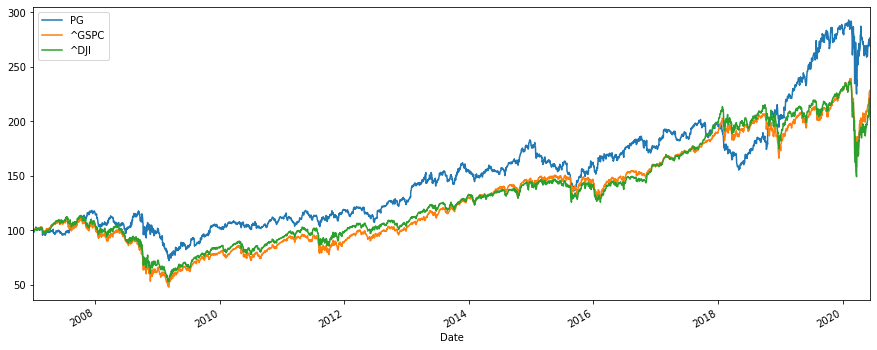

In [121]:
(data_2/data_2.iloc[0]*100).plot(figsize=(15,6));
plt.show()